Introduction to Gradient Descent and Autograd. 

- This problem will get you started with using automatic differentiation in Pytorch. 




---


Write a function that takes a 2D variable x and returns f(x). Helpful functions: torch.exp for exponents, torch.tensor to define vectors, and torch.sum to add up elements of a vector. All other operations can use built in Python functions. 

---



In [1]:
# Importing necessary libraries
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

Performing gradient descent on the function:

$
f(x) = - 2 \exp\{ - (x_1 - 1)^2 - (x_2 -1)^2 \} - \exp\{ - (x_1 + 2)^2 - (x_2 + 
3)^2 \}
$

where $x = (x_1, x_2)$ is a 2D variable.


In [2]:
### Creating function, takes input of a 2D - torch tensor

def grad_func(x_tensor):
  y = -2*torch.exp(-(x_tensor[0] - torch.Tensor([1.0]))**2 - (x_tensor[1] - torch.Tensor([1.0]))**2) - torch.exp(-(x_tensor[0] + torch.Tensor([2.0]))**2 - (x_tensor[1] + torch.Tensor([3.0]))**2)
  return y

def func(x_input, y_input):
  z = -2*np.exp(-(x_input-1)**2 - (y_input-1)**2) - np.exp(-(x_input+2)**2 - (y_input+3)**2)
  return z


# Perform gradient descent on f starting from two different values of x: (0,0) and (-1,1)


---


- Tune your
step size η. You can tune by printing out how f changes during each step. The change should be
gradual. What is a good step size for reasonably fast convergence? How many steps does convergence
take? What minima did you find? (you should be able to identify the approximate local minima by
just inspecting the formula of f)

Gradient Descent, Initialization at x = 0, 0

---



In [3]:
### Testing out if the function works on 0, 0

init_x = torch.tensor([0.0,0.0])

grad_func(init_x)

tensor([-0.2707])

In [4]:
### Let alpha denote step size
### Let iter denote number of iterations

alpha = 0.075
iter = 36

### Make autograd variable for the initialized value of x, 
### after gradient descent, it will be passed back to x

x = torch.autograd.Variable(init_x, requires_grad = True)

### If true, the variable is activated for autograd computations
x.requires_grad

True

**The x1 and x2 values that allows this function to converge seem to be (1,1)**

Initializing the starting point at 0, 0 -- a reasonable step size and number of iterations is 0.25 and 10, respectively. 

In [5]:
### Gradient descent and also figuring out the y-values after every iteration
# Figuring out x tensor and function value for every iteration
x1_values = []
x2_values = []
y_values = []

### for loop for num iterations, will find:
# gradient, append x tensors, append function value, print x tensor, updates tensor for every iteration
for i in range(iter):
  x_grad = torch.autograd.grad(grad_func(x), x)[0]
  x1_values.append(x.data.clone()[0])
  x2_values.append(x.data.clone()[1])
  y_values.append(grad_func(x.data.clone()))
  print(f"x1 and x2 are: {x.data} for the {i+1}th iteration")
  x.data -= alpha*x_grad

x = x.detach()
x.requires_grad

### Print the tensor that minimizes the function
print(f'Final minimizer from gradient descent: {x.data}')

### Print the function minimum
print(f'The minimal value of the function is {grad_func(x.data)}')

x1 and x2 are: tensor([0., 0.]) for the 1th iteration
x1 and x2 are: tensor([0.0406, 0.0406]) for the 2th iteration
x1 and x2 are: tensor([0.0863, 0.0863]) for the 3th iteration
x1 and x2 are: tensor([0.1379, 0.1379]) for the 4th iteration
x1 and x2 are: tensor([0.1964, 0.1964]) for the 5th iteration
x1 and x2 are: tensor([0.2626, 0.2626]) for the 6th iteration
x1 and x2 are: tensor([0.3372, 0.3372]) for the 7th iteration
x1 and x2 are: tensor([0.4198, 0.4198]) for the 8th iteration
x1 and x2 are: tensor([0.5086, 0.5086]) for the 9th iteration
x1 and x2 are: tensor([0.5995, 0.5995]) for the 10th iteration
x1 and x2 are: tensor([0.6867, 0.6867]) for the 11th iteration
x1 and x2 are: tensor([0.7639, 0.7639]) for the 12th iteration
x1 and x2 are: tensor([0.8273, 0.8273]) for the 13th iteration
x1 and x2 are: tensor([0.8761, 0.8761]) for the 14th iteration
x1 and x2 are: tensor([0.9121, 0.9121]) for the 15th iteration
x1 and x2 are: tensor([0.9381, 0.9381]) for the 16th iteration
x1 and x2



---



Gradient Descent, Initialization at x = -1, -1

---

**The x1 and x2 values that allows this function to converge seem to be (-2,-3), when we initialize the tensor at -1, -1**

A reasonable step size is .25 and about 60 iterations

In [6]:
### Let's initialize the values at -1,1 now

init_x2 = torch.Tensor([-1.0,-1.0])

### Step size for this initialization
alpha2 = .25
iter2 = 60

### turning initialized x2 into an autograd variable
x2 = torch.autograd.Variable(init_x2, requires_grad = True)

x1_values2 = []
x2_values2 = []
y_values2 = []

### For loop will find:
# gradient, append x tensors, append function value, updates tensor for every iteration
for i in range(iter2):
  x_grad2 = torch.autograd.grad(grad_func(x2), x2)[0]
  x1_values2.append(x2.data.clone()[0])
  x2_values2.append(x2.data.clone()[1])
  y_values2.append(grad_func(x2.data.clone()))
  # print(f"x1 and x2 are: {x2.data} for the {i+1}th iteration")
  x2.data -= alpha2*x_grad2

x2 = x2.detach()

### Taking a bit more iterations than the previous x initialization, 
print(f'Final minimizer from gradient descent for 2nd initialization of (-1,-1): {x2.data}')

print(f'The minimal value of the function is {grad_func(x2.data)}')

Final minimizer from gradient descent for 2nd initialization of (-1,-1): tensor([-2.0000, -3.0000])
The minimal value of the function is tensor([-1.])


# Plot the paths of your gradient descent


---


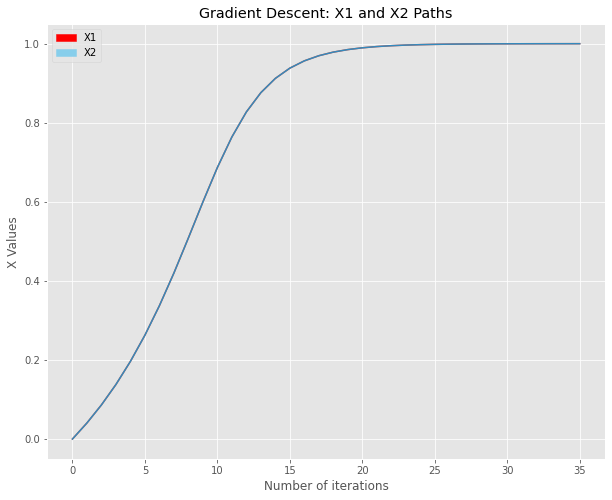

In [8]:
### Plot the x1 and x2 path with the initialization of (0,0)

fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(range(iter), x1_values)
axs.plot(range(iter), x2_values)
axs.set_title('Gradient Descent: X1 and X2 Paths')
axs.set_xlabel('Number of iterations')
axs.set_ylabel('X Values')
red_line = mpatches.Patch(color='red', label='X1')
blue_line = mpatches.Patch(color='skyblue', label='X2')
axs.legend(handles=[red_line, blue_line])
fig.show()

## Gradient Descent, number of iterations vs. Function value

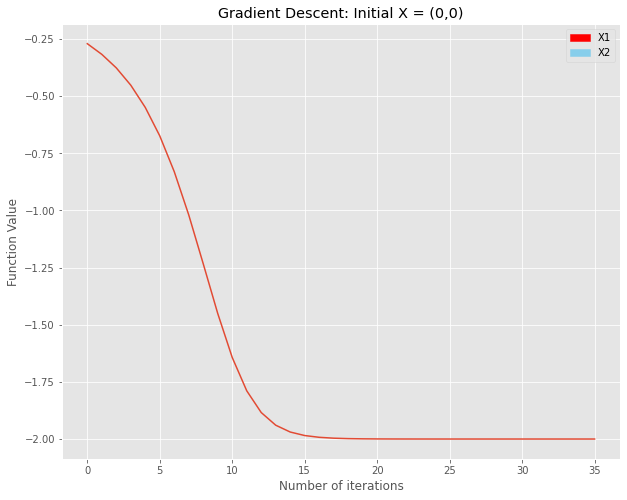

In [9]:
### plot the gradient descent for the x tensor initialization of (0,0)

fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(range(iter), y_values)
axs.set_title('Gradient Descent: Initial X = (0,0)')
axs.set_xlabel('Number of iterations')
axs.set_ylabel('Function Value')
axs.legend(handles=[red_line, blue_line])
fig.show()



---


**Initialization of tensor [-1,-1]**




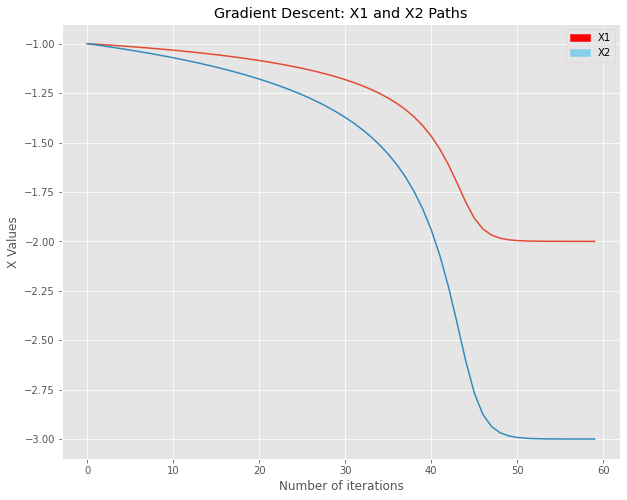

In [10]:
### Plot the x1 and x2 path with the initialization of (-1,-1)

fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(range(iter2), x1_values2)
axs.plot(range(iter2), x2_values2)
axs.set_title('Gradient Descent: X1 and X2 Paths')
axs.set_xlabel('Number of iterations')
axs.set_ylabel('X Values')
red_line = mpatches.Patch(color='red', label='X1')
blue_line = mpatches.Patch(color='skyblue', label='X2')
axs.legend(handles=[red_line, blue_line])
fig.show()

Gradient Descent, number of iterations vs. Function value

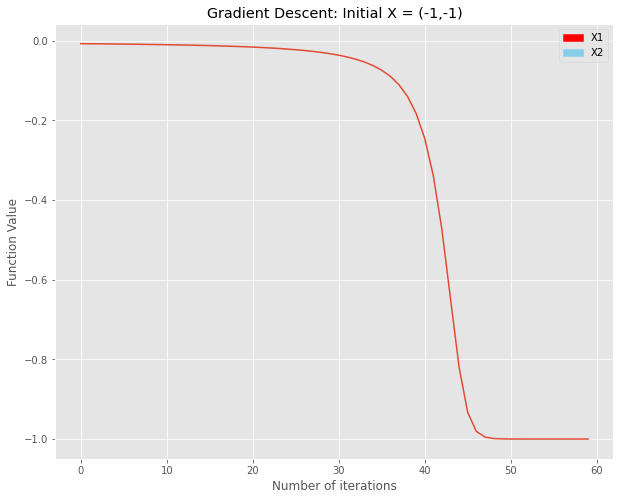

In [11]:
### plot the gradient descent for the x tensor initialization of (-1,-1)

fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(range(iter2), y_values2)
axs.set_title('Gradient Descent: Initial X = (-1,-1)')
axs.set_xlabel('Number of iterations')
axs.set_ylabel('Function Value')
axs.legend(handles=[red_line, blue_line])
fig.show()

# Plotting the gradient descent path along an actual 3D surface of Function


In [13]:
# Initializing plot specifications
x_plotting = np.linspace(-4,4,100)
y_plotting = np.linspace(-6,4,100)
X, Y = np.meshgrid(x_plotting, y_plotting)
z_plotting = func(X, Y)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


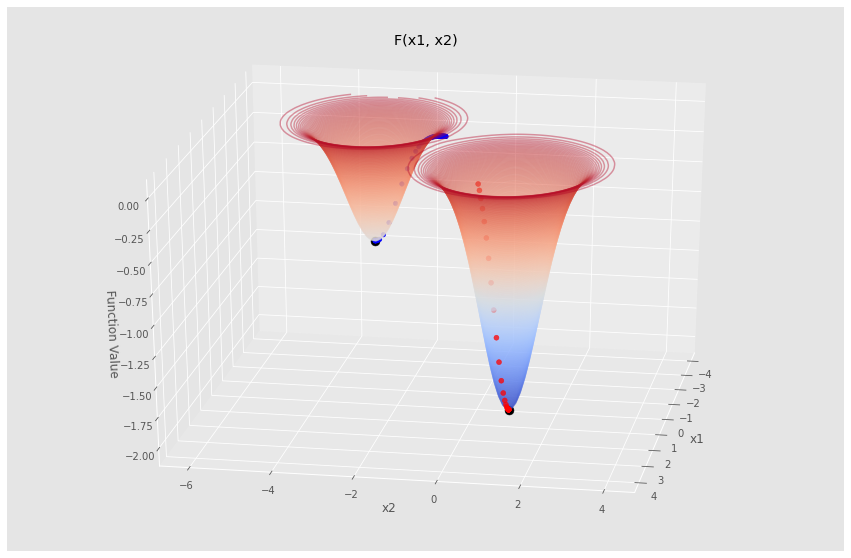

In [16]:
# Plotting function with gradient descent path
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(X, Y, z_plotting, 350, cmap = 'coolwarm', alpha = 0.4)
ax.scatter3D(x1_values[-1],x2_values[-1],y_values[-1], alpha = 1, c = 'black', s = 80)
ax.scatter3D(x1_values,x2_values,y_values, alpha = 0.75, c = 'red', s = 25)
ax.scatter3D(x1_values2[-1],x2_values2[-1],y_values2[-1], alpha = 1, c = 'black', s = 80)
ax.scatter3D(x1_values2,x2_values2,y_values2, alpha = 1, c = 'blue')
ax.view_init(25, 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Function Value')
ax.set_title('F(x1, x2)')
fig.show()

# 

In [ ]:
# Interactive 3D graph of function

import plotly.graph_objects as go
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=z_plotting)])
fig.update_layout(title='Loss function for X1 and X2', autosize=True,
                  width=750, height=750, xaxis_title='x1', yaxis_title='x2')
fig.show()